<a href="https://colab.research.google.com/github/Pavan5527/Hierarchical_Clustering_Using_Python_and_R/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libraries
import pandas as pd      # Pandas is a powerful data manipulation library
import numpy as np       # NumPy provides support for arrays and mathematical functions
import matplotlib.pyplot as plt  # Matplotlib is used for creating visualizations, such as plots and charts


In [3]:
data = pd.read_csv('Mall_Customers.csv')  # Reading or importing the dataset using Pandas from a CSV file


In [4]:
data.head(5)  # Displays the first five rows with all columns of our dataset using the head() function


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape  # Returns the dimensions of the dataset (number of rows, number of columns)


(200, 5)

In [6]:
import pandas as pd  # Importing the Pandas library for data manipulation
from sklearn.preprocessing import MinMaxScaler  # Importing MinMaxScaler from scikit-learn for feature scaling

# Assuming you have already loaded your dataset into a DataFrame named 'data'
# data = pd.read_csv('Mall_Customers.csv')

# Extract numerical columns for normalization
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a MinMaxScaler
scaler = MinMaxScaler()  # Initializing the MinMaxScaler object

# Normalize the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])  # Applying Min-Max scaling to the selected numerical columns

# Display the normalized data
print(data.head())  # Printing the first five rows of the dataset after normalization


   CustomerID   Genre       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  0.019231            0.000000                0.387755
1           2    Male  0.057692            0.000000                0.816327
2           3  Female  0.038462            0.008197                0.051020
3           4  Female  0.096154            0.008197                0.775510
4           5  Female  0.250000            0.016393                0.397959


In [7]:
data.head(5)  # Displays the first five rows of the DataFrame 'data'


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959


In [8]:
data.isnull().values.any()  # Checks whether there are any missing values in the entire dataset


False

In [9]:
data.isnull().sum()  # Checks for the count of missing values in each feature (column) of the dataset


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.fillna(method='ffill', axis=0, inplace=True)  # Forward-fill missing values in the dataset


In [11]:
data.isnull().values.any()  # Checks whether there are any missing values in the entire dataset after forward-fill


False

In [ ]:
data.dtypes

CustomerID                  int64
Genre                      object
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

In [12]:
data.describe()  # Generates descriptive statistics of the dataset


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.400962,0.373443,0.502041
std,57.879185,0.268635,0.215285,0.263505
min,1.000000,0.000000,0.000000,0.000000
25%,50.750000,0.206731,0.217213,0.344388
50%,100.500000,0.346154,0.381148,0.500000
75%,150.250000,0.596154,0.516393,0.734694
max,200.000000,1.000000,1.000000,1.000000


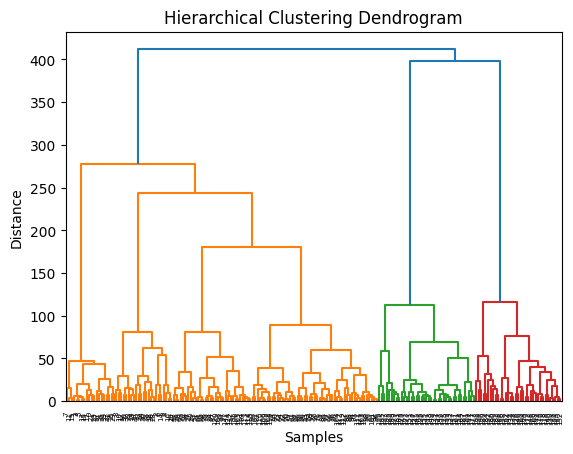

In [13]:
import pandas as pd  # Importing the Pandas library for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
from scipy.cluster import hierarchy  # Importing hierarchical clustering functions from SciPy
from scipy.spatial.distance import pdist  # Importing pairwise distance calculation from SciPy
from sklearn.impute import SimpleImputer  # Importing SimpleImputer from scikit-learn for handling missing values

# Load your dataset
# file_path = r"C:\Users\Pavan\Desktop\AI\credit_card.csv"
data = pd.read_csv('Mall_Customers.csv')  # Reading or importing the dataset

# Extract the relevant features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Handle missing values by imputing the mean
imputer = SimpleImputer(strategy='mean')  # Creating an imputer object with mean imputation strategy
features_imputed = imputer.fit_transform(features)  # Applying mean imputation to handle missing values

# Calculate the pairwise distance matrix
distance_matrix = pdist(features_imputed)  # Calculating the pairwise distance matrix between data points

# Perform hierarchical/agglomerative clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='ward')  # Performing hierarchical clustering using Ward's method

# Create a dendrogram
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=data.index, orientation='top')  # Creating a dendrogram for visualization

# Show the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  # Displaying the hierarchical clustering dendrogram


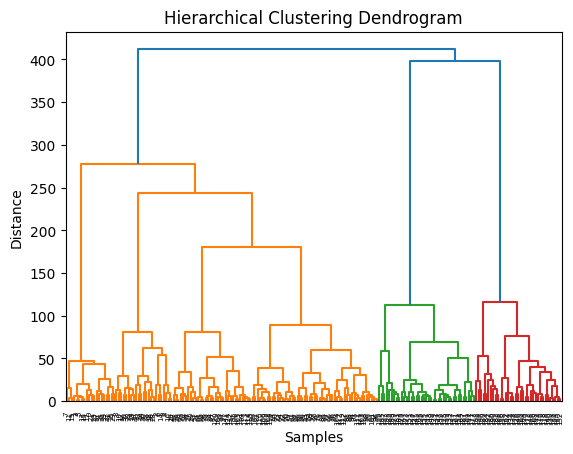

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        0
1     21                  15                      81        0
2     20                  16                       6        0
3     23                  16                      77        0
4     31                  17                      40        0
..   ...                 ...                     ...      ...
195   35                 120                      79        2
196   45                 126                      28        1
197   32                 126                      74        2
198   32                 137                      18        1
199   30                 137                      83        2

[200 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [14]:
import pandas as pd  # Importing the Pandas library for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
from scipy.cluster import hierarchy  # Importing hierarchical clustering functions from SciPy
from scipy.spatial.distance import pdist  # Importing pairwise distance calculation from SciPy
from sklearn.impute import SimpleImputer  # Importing SimpleImputer from scikit-learn for handling missing values
from sklearn.cluster import AgglomerativeClustering  # Importing AgglomerativeClustering from scikit-learn for clustering

# Load your dataset
data = pd.read_csv('Mall_Customers.csv')  # Reading or importing the dataset

# Extract the relevant features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Handle missing values by imputing the mean
imputer = SimpleImputer(strategy='mean')  # Creating an imputer object with mean imputation strategy
features_imputed = imputer.fit_transform(features)  # Applying mean imputation to handle missing values

# Perform hierarchical/agglomerative clustering
linkage_matrix = hierarchy.linkage(pdist(features_imputed), method='ward')  # Performing hierarchical clustering using Ward's method

# Create a dendrogram
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=data.index, orientation='top')  # Creating a dendrogram for visualization

# Show the dendrogram plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  # Displaying the hierarchical clustering dendrogram

# Perform Agglomerative Clustering
n_clusters = 3  # Adjust the number of clusters as needed
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  # Creating an AgglomerativeClustering object
labels = agg_clustering.fit_predict(features_imputed)  # Performing agglomerative clustering and obtaining cluster labels

# Assign cluster labels to the original dataset
data['Cluster'] = labels

# Print or visualize the clustered data
print(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])


# New Section

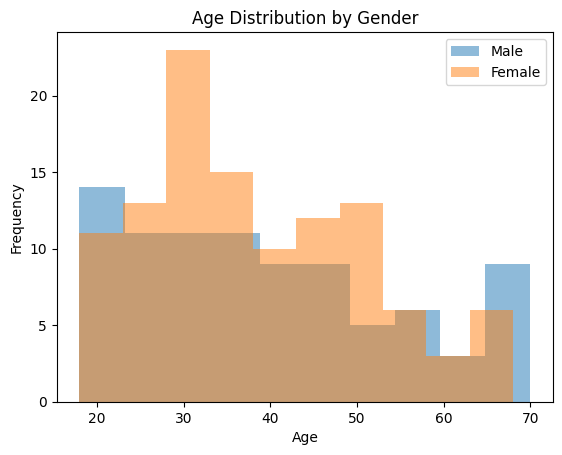

In [15]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Separate data based on gender
male_data = data[data['Genre'] == 'Male']  # Creating a DataFrame for male data
female_data = data[data['Genre'] == 'Female']  # Creating a DataFrame for female data

# Plot histograms for each gender
plt.hist(male_data['Age'], alpha=0.5, label='Male')  # Plotting a histogram for the age distribution of males with transparency and a label
plt.hist(female_data['Age'], alpha=0.5, label='Female')  # Plotting a histogram for the age distribution of females with transparency and a label

# Adding title and axis labels to the plot
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Displaying a legend to distinguish between male and female histograms
plt.legend()

# Showing the plot
plt.show()


In [16]:
import pandas as pd  # Importing the Pandas library for data manipulation
from sklearn.model_selection import train_test_split  # Importing train_test_split function from scikit-learn

# Assuming 'data' is your DataFrame
# Replace 'TARGET_VARIABLE' with the actual target variable in your dataset

# Select 'Age' and 'Genre' columns
X = data[['Age', 'Genre']]  # Selecting features for the model (independent variables)

# Identify the target variable
y = data['Spending Score (1-100)']  # Selecting the target variable (dependent variable)

# Split the data into training and test sets
# 'test_size' is the proportion of the dataset to include in the test split (e.g., 0.2 for 80-20 split)
# 'random_state' ensures reproducibility; you can set it to any integer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splitting the data into training and testing sets

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")  # Printing the shapes of the training sets
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")  # Printing the shapes of the testing sets


X_train shape: (160, 2), y_train shape: (160,)
X_test shape: (40, 2), y_test shape: (40,)


In [18]:
import pandas as pd  # Importing the Pandas library for data manipulation
from sklearn.model_selection import train_test_split  # Importing train_test_split function from scikit-learn
from sklearn.linear_model import LinearRegression  # Importing LinearRegression model from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score  # Importing evaluation metrics from scikit-learn
from sklearn.preprocessing import OneHotEncoder  # Importing OneHotEncoder for categorical encoding
from sklearn.compose import ColumnTransformer  # Importing ColumnTransformer for preprocessing

# Assuming 'data' is your DataFrame
# Replace 'TARGET_VARIABLE' with the actual target variable in your dataset

# Identify categorical columns
categorical_cols = ['Genre']  # Defining the categorical column(s)

# Create a ColumnTransformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # Applying OneHotEncoder to categorical columns
    ],
    remainder='passthrough'  # Keeping non-categorical columns as is
)

# Apply one-hot encoding to categorical columns and convert to numpy array
X_train_encoded = preprocessor.fit_transform(X_train)  # Fit and transform the training set
X_test_encoded = preprocessor.transform(X_test)  # Transform the test set using the fitted transformer

# Create and train a linear regression model
model = LinearRegression()  # Creating a Linear Regression model
model.fit(X_train_encoded, y_train)  # Training the model on the encoded training set

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)  # Making predictions on the encoded test set

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Calculating Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculating R-squared

# Print evaluation metrics
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared: 0.05682696453857772
Mean Squared Error: 465.21066801099187


In [19]:
import pandas as pd  # Importing the Pandas library for data manipulation
from sklearn.model_selection import train_test_split  # Importing train_test_split function from scikit-learn
from sklearn.linear_model import Lasso  # Importing Lasso Regression model from scikit-learn
from sklearn.preprocessing import OneHotEncoder  # Importing OneHotEncoder for categorical encoding
from sklearn.compose import ColumnTransformer  # Importing ColumnTransformer for preprocessing
from sklearn.metrics import mean_squared_error, r2_score  # Importing evaluation metrics from scikit-learn
import numpy as np  # Importing NumPy for numerical operations

# Assuming 'data' is your DataFrame
X = data[['Age', 'Genre']]  # Features
y = data['Spending Score (1-100)']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splitting the data into training and testing sets

# Identify categorical columns
categorical_cols = ['Genre']  # Defining the categorical column(s)

# Create a ColumnTransformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # Applying OneHotEncoder to categorical columns
    ],
    remainder='passthrough'  # Keeping non-categorical columns as is
)

# Apply one-hot encoding to categorical columns and convert to numpy array
X_train_encoded = preprocessor.fit_transform(X_train)  # Fit and transform the training set
X_test_encoded = preprocessor.transform(X_test)  # Transform the test set using the fitted transformer

# Create and train a Lasso Regression model
alpha_value = 0.01  # Adjust the regularization strength (alpha) as needed
lasso_model = Lasso(alpha=alpha_value)  # Creating a Lasso Regression model with specified alpha
lasso_model.fit(X_train_encoded, y_train)  # Training the model on the encoded training set

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_encoded)  # Making predictions on the encoded test set

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Calculating Mean Squared Error
rmse = np.sqrt(mse)  # Calculating Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculating R-squared

# Print evaluation metrics
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared: 0.05660778188733251
Mean Squared Error: 465.3187776618921


In [21]:
import pandas as pd  # Importing the Pandas library for data manipulation
from sklearn.model_selection import train_test_split  # Importing train_test_split function from scikit-learn
from sklearn.linear_model import LinearRegression  # Importing LinearRegression model from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score  # Importing evaluation metrics from scikit-learn

# Assuming 'data' is your DataFrame
# Replace 'TARGET_VARIABLE' with the actual target variable in your dataset

# Handle categorical variables (assuming 'Genre' is categorical)
X = pd.get_dummies(data[['Age', 'Genre']], columns=['Genre'], drop_first=True)  # One-hot encoding 'Genre' and dropping the first category to avoid multicollinearity
y = data['Spending Score (1-100)']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splitting the data into training and testing sets

# Create and train a linear regression model
model = LinearRegression()  # Creating a Linear Regression model
model.fit(X_train, y_train)  # Training the model on the training set

# Make predictions on the test set
y_pred = model.predict(X_test)  # Making predictions on the test set

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Calculating Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculating Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculating R-squared

# Print evaluation metrics
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared: 0.05682696453857772
Mean Squared Error: 465.21066801099187
